In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import line_search
import numpy as np

Define function, gradient and Hesse matrix

In [2]:
def f(x):
    return 100*(x[1]-x[0]**2)**2 + (1-x[0])**2

In [3]:
def gradf(x):
    return np.array([2*(200*x[0]**3-200*x[0]*x[1]+x[0]-1), 200*(x[1]-x[0]**2)])

In [4]:
def Hessef(x):
    return np.array([[1200*x[0]**2-400*x[1]+2, -400*x[0]],[-400*x[0], 200]])

Define different optimization function: steepest_descent, newton method, bfgs

In [5]:
def steepest_descent(xk):
    x_values = [xk]
    etak = 1
    iters =0
    sk = 1
    while np.linalg.norm(etak*sk) > 10**(-8) and iters < 2000:
        sk = -gradf(xk)
        etak = line_search(f,gradf,xk,sk)[0]
        xk = xk + etak*sk
        iters = iters + 1
        x_values.append(xk)    
    return xk, x_values, iters

In [6]:
def newton_method(xk):
    x_values = [xk]
    sk, iters = 1, 0
    while np.linalg.norm(sk) > 10**(-8) and iters < 2000:
        sk = np.linalg.solve(Hessef(xk), -gradf(xk))
        xk = xk + sk
        iters = iters + 1
        x_values.append(xk)
    return xk, x_values, iters

In [36]:
def bfgs(xk):
    Bk = np.identity(2)
    x_values = [xk]
    sk = 1
    iters = 0
    while np.linalg.norm(sk) > 10**(-8) and iters < 2000:
        sk = np.linalg.solve(Hessef(xk), -gradf(xk))
        xkplus = xk + sk
        yk = gradf(xkplus) - gradf(xk)
        num = np.matmul(np.matmul(Bk,np.outer(sk,sk.T)),Bk)
        den = np.inner(sk.T, np.matmul(Bk,sk))
        Bk  = Bk + np.outer(yk,yk.T) / np.inner(yk.T,sk) - num /den
        iters = iters + 1
        xk = np.copy(xkplus)
        x_values.append(xk)
    return xk, x_values, iters

Define plotting function

In [8]:
def plot(xopt, x_values):
    nx, ny = (200, 200)
    x = np.linspace(-3, 3, nx)
    y = np.linspace(-3, 3, ny)
    Z = np.zeros((nx,ny))

    xv, yv = np.meshgrid(x, y, sparse=False, indexing='ij')
    for i in range(nx):
        for j in range(ny):
            Z[i,j] = f([xv[i,j], yv[i,j]])
            
    x0_values = []
    x1_values = []
    for x in x_values:
        x0_values.append(x[0])
        x1_values.append(x[1])
        
    plt.contour(xv,yv,Z,[1,10,100,1000,5000], colors=['0','0.2','0.4','0.5','0.6']);
    plt.plot([1],[1],'or');
    plt.plot(x0_values,x1_values);

## TEST STEEPEST DESCENT

[1. 1.]
2


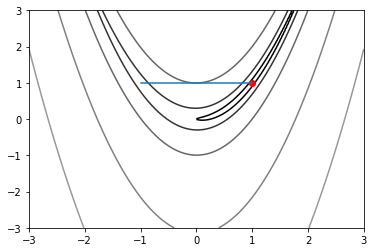

In [19]:
xopt, x_values, iters = steepest_descent(np.array([-1,1]))
plot(xopt, x_values)
print(xopt)
print(iters)

[0.99999957 0.99999913]
1571


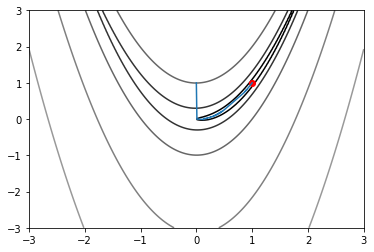

In [17]:
xopt, x_values, iters = steepest_descent(np.array([0,1]))
plot(xopt, x_values)
print(xopt)
print(iters)

[1.1657344  1.35997963]
2000


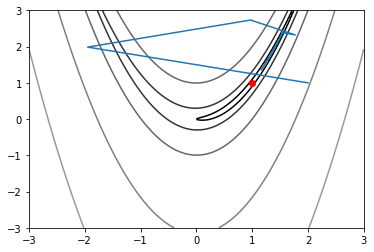

In [11]:
xopt, x_values, iters = steepest_descent(np.array([2,1]))
plot(xopt, x_values)
print(xopt)
print(iters)

## TEST NEWTON METHOD

[1. 1.]
3


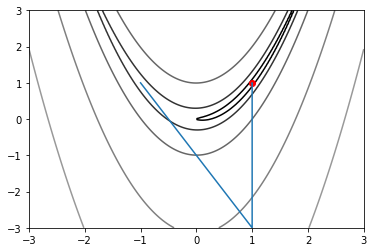

In [13]:
xopt, x_values, iters = newton_method(np.array([-1,1]))
plot(xopt, x_values)
print(xopt)
print(iters)

[1. 1.]
6


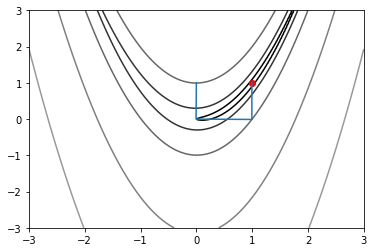

In [14]:
xopt, x_values, iters = newton_method(np.array([0,1]))
plot(xopt, x_values)
print(xopt)
print(iters)

[1. 1.]
6


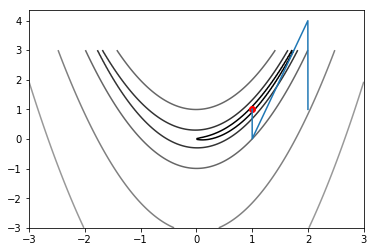

In [15]:
xopt, x_values, iters = newton_method(np.array([2,1]))
plot(xopt, x_values)
print(xopt)
print(iters)

## TEST BFGS

[1. 1.]
3


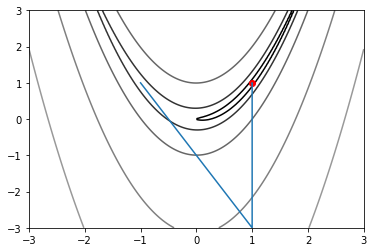

In [37]:
xopt, x_values, iters = bfgs(np.array([-1,1]))
plot(xopt, x_values)
print(xopt)
print(iters)

[1. 1.]
6


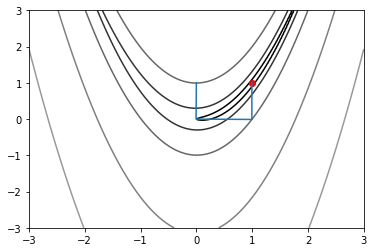

In [38]:
xopt, x_values, iters = bfgs(np.array([0,1]))
plot(xopt, x_values)
print(xopt)
print(iters)

[1. 1.]
6


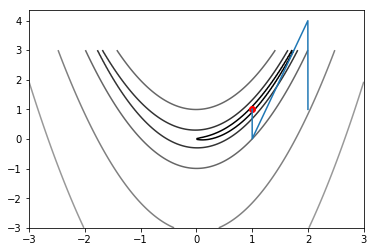

In [39]:
xopt, x_values, iters = bfgs(np.array([2,1]))
plot(xopt, x_values)
print(xopt)
print(iters)